Решить задачу кубического сплайна

In [12]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
import threading as tr

In [13]:
# Вариант 1
# Начальные данные:
x = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
y = [92228496,106021537,  123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]
print(len(x), len(y))

10 10


In [14]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

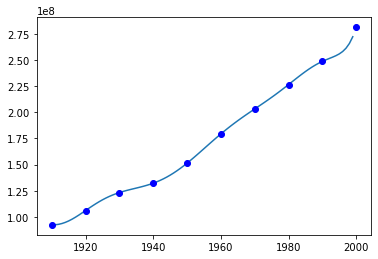

827906509.000001


In [41]:
x = np.array(x)
y = np.array(y)
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(1910, 2000, 1)
y_new = newton_poly(a_s, x, x_new)

fig, ax = plt.subplots()
ax.plot(x_new, y_new)
ax.plot(x, y, 'bo')
plt.show()

print(newton_poly(a_s, x, 2010))


340343089.4170388


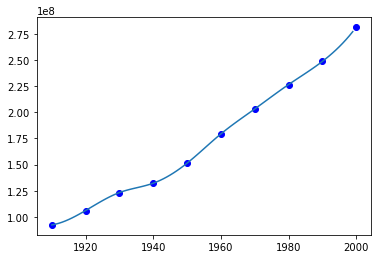

In [42]:
f = CubicSpline(x, y)
x_new = np.arange(1910, 2000, 1)
y_new = f(x_new)
Fig_2 = plt.subplot()
Fig_2.plot(x, y,'bo')
Fig_2.plot(x_new, y_new)
plt.show()
print(f(2010))